# Modeling Survey data

This document records modeling step. 

In [22]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
survey = survey('data/survey')

In [24]:
survey.cat_processor()

In [25]:
df_cat = survey.fin_data

In [26]:
y = df_cat.pop('employed').values
X = df_cat.values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.87862211940146862

In [14]:
rf.score()

array([ 0.7,  0.8,  0.1, ...,  0.7,  0.9,  0.1])

In [30]:
pd.crosstab(pred, y_test)

col_0,False,True
row_0,,
False,404,122
True,137,824


In [16]:
from sklearn import metrics

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])

In [18]:
roc = pd.DataFrame({"fpr":fpr,"tpr": tpr})

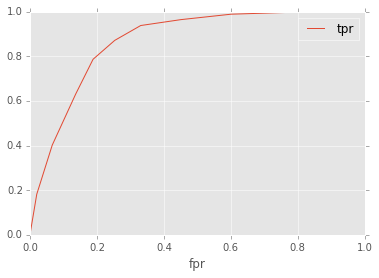

In [19]:
roc.plot(x = "fpr", y = 'tpr')